## Algorithm training, testing, and validation

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (16, 12)

In [2]:
# load clean dataset
data_load_path = '../data/clean/'
data_load_name = 'cleaned_solar_irradiation.csv'
cleaned_df= pd.read_csv(data_load_path + data_load_name)
cleaned_df.head()

,Unnamed: 0,MonthPE,Date,Daily_Temp,Daily_Precip,Daily_Humidity,Daily_Pressure,Daily_WindDir,Daily_WindSpeed,Daily_DNI,Daily_DHI,Daily_radiation
0,2018-12-31,12,2018-12-31,8.037500,10.700000,95.250000,1024.725000,292.500000,2.575000,0.000000,32.750000,32.750000
1,2019-01-01,1,2019-01-01,6.862500,12.212500,94.250000,1020.687500,290.875000,5.437500,9.750000,36.125000,37.000000
2,2019-01-02,1,2019-01-02,4.188889,7.600000,73.444444,1027.588889,345.111111,4.544444,8.333333,47.666667,48.555556
3,2019-01-03,1,2019-01-03,3.555556,8.977778,80.333333,1029.488889,342.888889,2.533333,3.333333,50.333333,50.555556
4,2019-01-04,1,2019-01-04,3.187500,9.025000,83.250000,1028.237500,314.625000,4.050000,2.750000,52.500000,53.250000


In [3]:
# display column names
cleaned_df.columns

Index(['Unnamed: 0', 'MonthPE', 'Date', 'Daily_Temp', 'Daily_Precip',
       'Daily_Humidity', 'Daily_Pressure', 'Daily_WindDir', 'Daily_WindSpeed',
       'Daily_DNI', 'Daily_DHI', 'Daily_radiation'],
      dtype='object')

In [4]:
# select features
cleaned_df= cleaned_df[['MonthPE', 'Date', 'Daily_Temp', 'Daily_Precip', 'Daily_Humidity', 'Daily_Pressure',\
                        'Daily_WindDir', 'Daily_WindSpeed', 'Daily_DNI', 'Daily_DHI', 'Daily_radiation']]

In [5]:
# Feature Engineering of Time Series Column
cleaned_df['Date'] = pd.to_datetime(cleaned_df['Date'], format='%Y-%m-%d')
cleaned_df['year'] = cleaned_df['Date'].dt.year
cleaned_df['month'] = cleaned_df['Date'].dt.month
cleaned_df['day'] = cleaned_df['Date'].dt.day

In [6]:
# display column names
cleaned_df.columns

Index(['MonthPE', 'Date', 'Daily_Temp', 'Daily_Precip', 'Daily_Humidity',
       'Daily_Pressure', 'Daily_WindDir', 'Daily_WindSpeed', 'Daily_DNI',
       'Daily_DHI', 'Daily_radiation', 'year', 'month', 'day'],
      dtype='object')

In [7]:
# select features
cleaned_df = cleaned_df[['month', 'day', 'Daily_Temp', 'Daily_Precip', 'Daily_Humidity',
       'Daily_Pressure', 'Daily_WindDir', 'Daily_WindSpeed', 'Daily_DNI',
       'Daily_DHI', 'Daily_radiation']]
cleaned_df.head()

,month,day,Daily_Temp,Daily_Precip,Daily_Humidity,Daily_Pressure,Daily_WindDir,Daily_WindSpeed,Daily_DNI,Daily_DHI,Daily_radiation
0,12,31,8.037500,10.700000,95.250000,1024.725000,292.500000,2.575000,0.000000,32.750000,32.750000
1,1,1,6.862500,12.212500,94.250000,1020.687500,290.875000,5.437500,9.750000,36.125000,37.000000
2,1,2,4.188889,7.600000,73.444444,1027.588889,345.111111,4.544444,8.333333,47.666667,48.555556
3,1,3,3.555556,8.977778,80.333333,1029.488889,342.888889,2.533333,3.333333,50.333333,50.555556
4,1,4,3.187500,9.025000,83.250000,1028.237500,314.625000,4.050000,2.750000,52.500000,53.250000


### Model training and testing

In [8]:
# import libraries for algorithms traininng, and metrics to judge performance
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
# produces a 70%, 15%, 15% split for training, validation and test sets
train_data, validation_data, test_data = np.split(
    cleaned_df.sample(frac = 1), 
    [int(.7 * len(cleaned_df)), int(.85 * len(cleaned_df))]
)

# convert dataframes to .csv and save locally
data_save_path = '../data/clean/'

train_data.to_csv(data_save_path + 'train.csv', header=True, index=False)
validation_data.to_csv(data_save_path + 'val.csv', header=True, index = False)
test_data.to_csv(data_save_path + 'test.csv', header = True, index = False)

In [10]:
# training data
train_df = pd.read_csv(data_load_path + 'train.csv')
X_train = train_df.drop(['Daily_radiation'], axis = 1)
y_train = train_df['Daily_radiation']

# test data
test_df = pd.read_csv(data_load_path + 'test.csv')
X_test = test_df.drop(['Daily_radiation'], axis = 1)
y_test = test_df['Daily_radiation']

### Linear Regression

In [11]:
# Setup the pipeline steps for linear regression
steps = [
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
]

# Create the pipeline
pipeline_lr = Pipeline(steps)

# Fit the pipeline to the train set
pipeline_lr.fit(X_train, y_train)

# Predict the labels of the test set
y_pred_lr = pipeline_lr.predict(X_test)

In [12]:
# Evaluating algorithm performance
mse = mean_squared_error(y_test, y_pred_lr, squared = False)
print('r2_score: ', r2_score(y_test, y_pred_lr))
print('Mean Squared Error: %.2f' % (mse))

r2_score:  0.9397860807754174
Mean Squared Error: 31.13


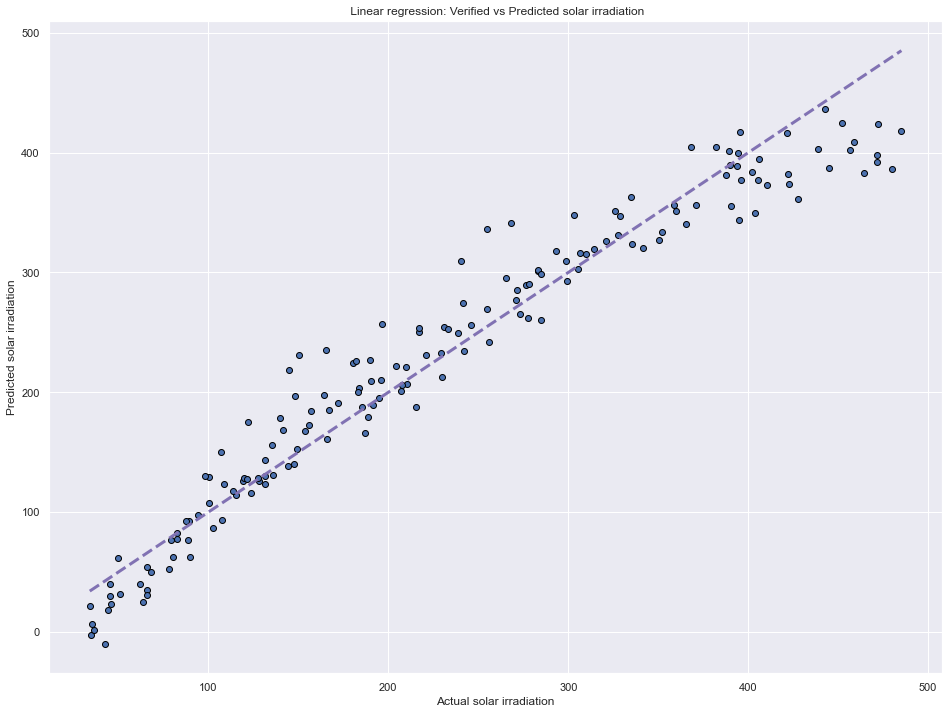

In [13]:
# Run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_lr, edgecolors = (0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw = 3)
pX.set_xlabel('Actual solar irradiation')
pX.set_ylabel('Predicted solar irradiation')
pX.set_title(" Linear regression: Verified vs Predicted solar irradiation")
plt.show() 

c:\users\rag\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


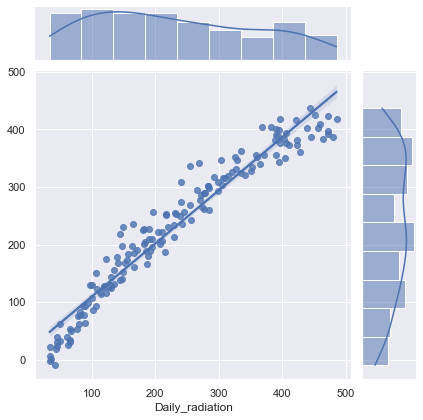

In [14]:
sns.jointplot(y_test, y_pred_lr, kind = 'reg')
plt.show()

### Random Forest Regressor

In [15]:
# Setup the random forest model: rft
rfr = RandomForestRegressor()

# Fit the pipeline to the train set
rfr.fit(X_train, y_train)

# Predict the labels of the test set
y_pred_rfr = rfr.predict(X_test)

In [16]:
# Evaluating algorithm performance
mse_rf = mean_squared_error(y_test, y_pred_rfr, squared = False)
print('r2_score: ', r2_score(y_test, y_pred_rfr))
print('Mean Squared Error: %.2f' % (mse_rf))

r2_score:  0.9659397680205433
Mean Squared Error: 23.41


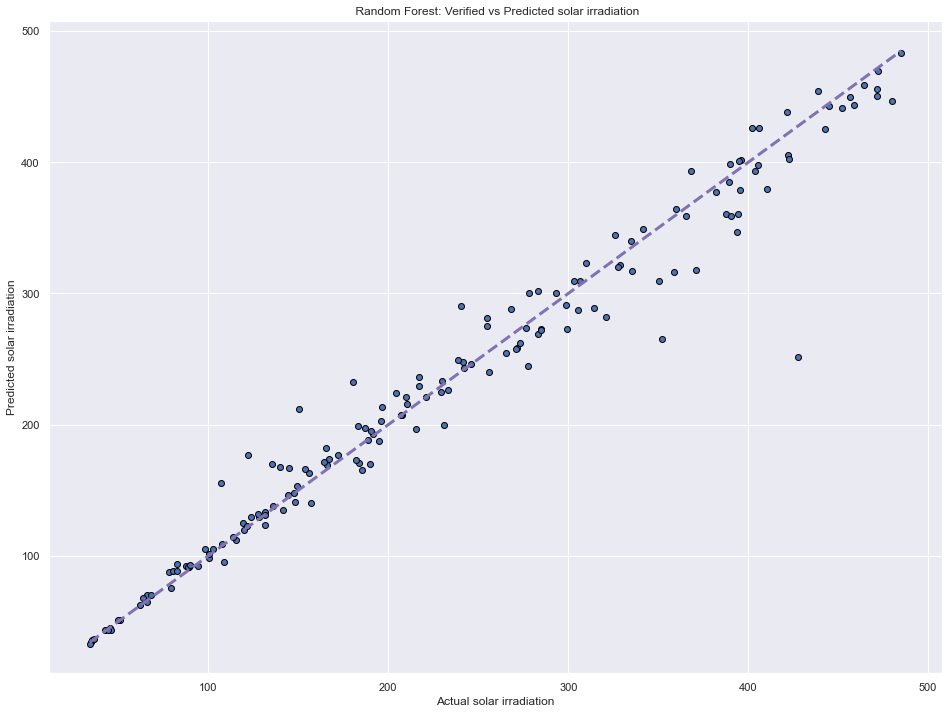

In [17]:
# Run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_rfr, edgecolors = (0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw = 3)
pX.set_xlabel('Actual solar irradiation')
pX.set_ylabel('Predicted solar irradiation')
pX.set_title(" Random Forest: Verified vs Predicted solar irradiation")
plt.show()

c:\users\rag\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


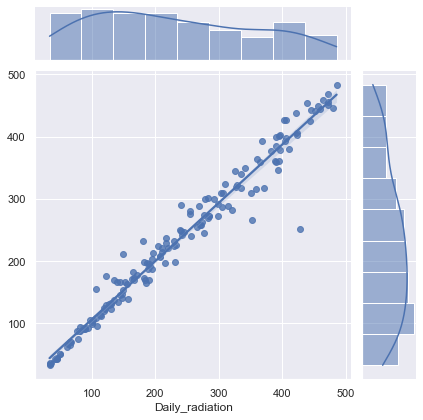

In [18]:
sns.jointplot(y_test, y_pred_rfr, kind = 'reg')
plt.show()

### GradientBoosting Regressor

In [19]:
# Setup the gradient boosting model: gbr
gbr = GradientBoostingRegressor()

# Fit the pipeline to the train set
gbr.fit(X_train, y_train)

# Predict the labels of the test set
y_pred_gbr = gbr.predict(X_test)

In [20]:
# Evaluating algorithm performance
mse_gr = mean_squared_error(y_test, y_pred_gbr, squared = False)
print('r2_score: ', r2_score(y_test, y_pred_gbr))
print('Mean Squared Error: %.2f' % (mse_gr))

r2_score:  0.9688468055770324
Mean Squared Error: 22.39


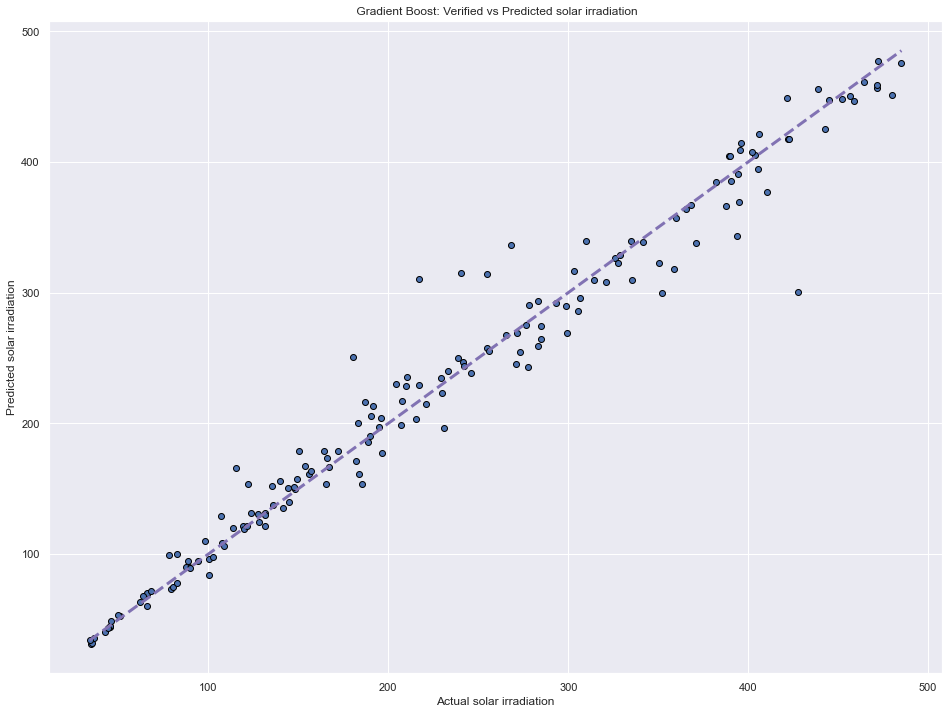

In [21]:
# Run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_gbr, edgecolors = (0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw = 3)
pX.set_xlabel('Actual solar irradiation')
pX.set_ylabel('Predicted solar irradiation')
pX.set_title(" Gradient Boost: Verified vs Predicted solar irradiation")
plt.show()

c:\users\rag\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


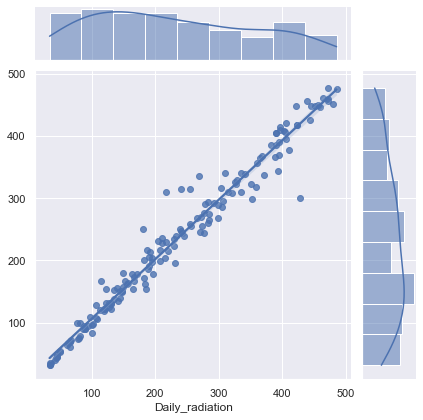

In [22]:
sns.jointplot(y_test, y_pred_gbr, kind = 'reg')
plt.show()

### Model Validation

In [23]:
# validation data
val_df = pd.read_csv(data_load_path + 'val.csv')
X_val = val_df.drop(['Daily_radiation'], axis=1)
y_val = val_df['Daily_radiation']

In [24]:
# validate models
y_val_lr = pipeline_lr.predict(X_val)
y_val_rfr = rfr.predict(X_val)
y_val_gbr = gbr.predict(X_val)

In [25]:
# Evaluating algorithm performance for linear regression
mse_lr_val = mean_squared_error(y_val, y_val_lr, squared = False)
print('r2_score: ', r2_score(y_val, y_val_lr))
print('Linear Regression - Mean Squared Error: %.2f' % (mse_lr_val))

r2_score:  0.936519244622433
Linear Regression - Mean Squared Error: 31.14


In [26]:
# Evaluating algorithm performance for random forest regression
mse_rf_val = mean_squared_error(y_val, y_val_rfr, squared = False)
print('r2_score: ', r2_score(y_val, y_val_rfr))
print('Random Forest - Mean Squared Error: %.2f' % (mse_rf_val))

r2_score:  0.9817373279625414
Random Forest - Mean Squared Error: 16.70


In [27]:
# Evaluating algorithm performance for gradient boost regression
mse_gbr_val = mean_squared_error(y_val, y_val_gbr, squared = False)
print('r2_score: ', r2_score(y_val, y_val_gbr))
print('Gradient Boost - Mean Squared Error: %.2f' % (mse_gbr_val))

r2_score:  0.9772909504218356
Gradient Boost - Mean Squared Error: 18.62
